
# Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the dataset

In [41]:
dataset = pd.read_csv('Mall_Customers.csv')
print(dataset.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# length of data
dataset.shape

(200, 5)

In [5]:
# information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#some basic statistical data
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# different Genre present
dataset.Genre.unique()

array(['Male', 'Female'], dtype=object)

In [24]:
dataset.Genre.value_counts()

# female count more!!

Female    112
Male       88
Name: Genre, dtype: int64

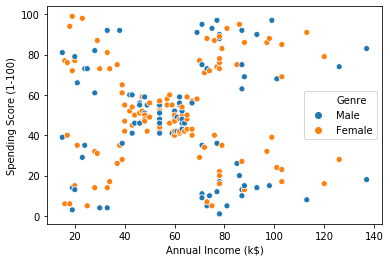

In [27]:
# Genre vs spending score vs annual_income

sns.scatterplot(x = 'Annual Income (k$)',  y = 'Spending Score (1-100)',data = dataset, hue = 'Genre' )

Here scatter plot shows that most costumers with :
    1. high spending score have low income
    2. low spending scores have high income
    
Therefore no clear picture.    

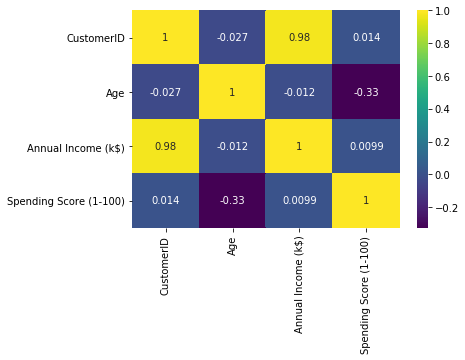

In [13]:
# correlation
sns.heatmap(dataset.corr(), annot = True, cmap = 'viridis')

From above we conclude that:
    1. Spending score and income are not related(which we thought would)
    2. CostumerId and Income are highly positively related.

<Figure size 360x360 with 0 Axes>

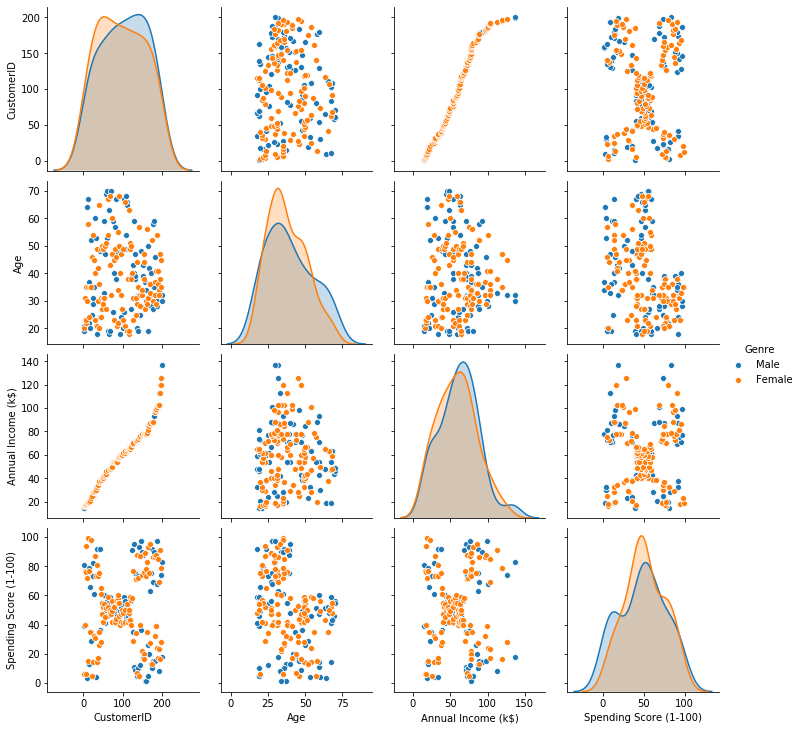

In [23]:
plt.figure(figsize = (5,5))
sns.pairplot(dataset, hue = 'Genre')

In [42]:
# converting object 'genre' into numerical form
dataset['Genre'] = dataset.Genre.apply(lambda x :  0 if x == 'Male' else 1)

In [43]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


# Scaling data
Our dataset is not scaled some values are much bigger than others,if we will not scale our data 
our model will not going to perform well.So now we are are going to scale our data for this we 
are going to use a StandardScaler library.
StandardScaler transform the data such the the mean will be 0 and variance will be 1.

Note:- Scaling data is necessary just for the algorithms which is based on the distance like 
K-means clustering and Hierarchical clustering

In [49]:
df = dataset.iloc[:,1:]

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

In [51]:
scaled_df = pd.DataFrame(scaled, columns = [df.columns])
scaled_df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


# K-Means Clustering 
K-means Clustering is the most popular unsupervised machine learning algorithm.It is a centroid-based or distance-based algorithm.The woking of the alorithms is as follows:

1. First we initialize k points called means randomly
2. Then we categorize each item to its closest mean and we update the mean's coordinates,which are the averages of the items categorized in the mean so far
3. We repeat the process for a given number of iteartions and at the end,we have our clusters
To decide how many number of clusters consider we are going to use a most popular elbow method

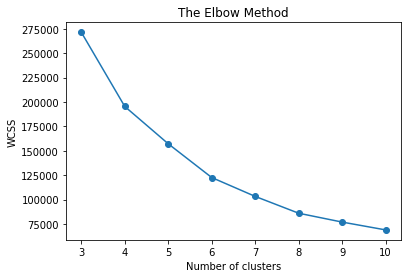

In [52]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

distance = []

K=range(3,11)
for i in K:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(dataset)
    distance.append(kmeans.inertia_)  # wcss
    
plt.plot(K, distance, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As we can see the elbow or a knee like bend is at 5.So choosing 5 as a number of clusters

In [53]:
#chosing no. of clusters as 5 and refitting kmeans model
kmeans = KMeans(n_clusters = 5,random_state = 0)
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [56]:
#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts(ascending = True)

2    28
1    29
4    39
3    48
0    56
dtype: int64

Now we are going to check how our model is,using Silhouette Coefficient



In [59]:
#calculate how good our model is
#calculate Silhouette Coefficient for K=3
from sklearn import metrics
metrics.silhouette_score(scaled_df, kmeans.labels_)

0.31437614343154285

# Prediction


In [60]:
#predicting values
cluster_labels = kmeans.fit_predict(scaled_df)

In [63]:
preds = kmeans.labels_
kmeans_df = pd.DataFrame(dataset)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),KMeans_Clusters
0,1,0,19,15,39,4
1,2,0,21,15,81,4
2,3,1,20,16,6,3
3,4,1,23,16,77,0
4,5,1,31,17,40,3
5,6,1,22,17,76,0
6,7,1,35,18,6,3
7,8,1,23,18,94,0
8,9,0,64,19,3,2
9,10,1,30,19,72,0


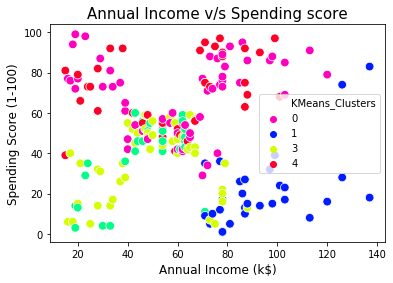

In [87]:
#visulization of clusters AnnualIncome v/s SpendingScore
sns.scatterplot(kmeans_df['Annual Income (k$)'],kmeans_df['Spending Score (1-100)'],
                hue='KMeans_Clusters',data=kmeans_df, palette = 'gist_rainbow_r',s = 75) 

plt.title("Annual Income v/s Spending score", fontsize=15)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)
plt.show()

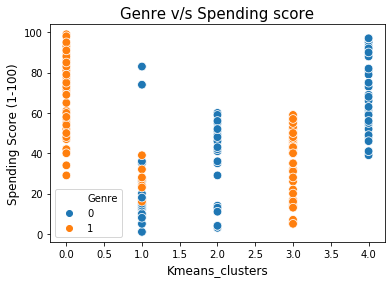

In [81]:
#visulization of clusters genre spending score
sns.scatterplot(kmeans_df['KMeans_Clusters'],kmeans_df['Spending Score (1-100)'],
                hue='Genre',data=kmeans_df,s = 75) 
plt.title("Genre v/s Spending score", fontsize=15)
plt.xlabel("Kmeans_clusters", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)
plt.legend(loc = 'best')
plt.show()

Here we conclude that from both the graphs that:
    `cluster 0` and `cluster 4` are our target audience

# Target Costumers

In [95]:
# 0 and 4
tc = kmeans_df[(kmeans_df['KMeans_Clusters'] == 0) | ( kmeans_df['KMeans_Clusters'] == 4)  ]

In [97]:
tc.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),KMeans_Clusters
0,1,0,19,15,39,4
1,2,0,21,15,81,4
3,4,1,23,16,77,0
5,6,1,22,17,76,0
7,8,1,23,18,94,0
9,10,1,30,19,72,0
11,12,1,35,19,99,0
13,14,1,24,20,77,0
15,16,0,22,20,79,4
17,18,0,20,21,66,4


In [96]:
tc.Genre.value_counts()

1    56
0    39
Name: Genre, dtype: int64